In [6]:
import json
import pandas as pd

In [2]:
classe2CECR = {"Très Facile": "A1", "Facile": "A2", "Accessible": "B1", "+Complexe": "B2"}

In [7]:
# Load local JSON annotations
with open('annotations.json', 'r') as f:
    json_data = json.load(f)
local_df = pd.DataFrame(json_data)

# Load global annotations
file_path = 'Qualtrics_Annotations_B.csv'
global_df = pd.read_csv(file_path, delimiter="\t", index_col="text_indice")
global_df = global_df[~global_df.index.duplicated(keep='first')]
global_df = global_df[['text', 'gold_score_20_label']]
global_df['classe'] = global_df['gold_score_20_label'].map(classe2CECR)

# Match texts and assign labels
indexes = []
for local_text in local_df['text']:
    matching_indexes = global_df[global_df['text'] == local_text].index.tolist()
    indexes.append(matching_indexes[0] if matching_indexes else -1)

local_df['text_indice'] = indexes
local_df['gold_score_20_label'] = local_df['text_indice'].apply(
    lambda x: global_df.at[x, 'gold_score_20_label'] if x != -1 else None
)
local_df['classe'] = local_df['gold_score_20_label'].map(classe2CECR)

In [27]:
df_annotations_all = local_df['annotations'].apply(lambda x: json_normalize(x))
df_all_annotations = pd.concat([df for df in df_annotations_all], ignore_index=True)

In [29]:
df_all_annotations

,text,start,end,label,annotators,confidence
0,rejoindre,71,80,"Graphie, problème de déchiffrage","[VAV, VIL]",0.67
1,Heureusement,308,320,"Graphie, problème de déchiffrage",[VIL],0.33
2,d'alphabétisation.,968,986,"Graphie, problème de déchiffrage","[VAV, VIL]",0.67
3,et j'ai à nouveau perdu tous mes amis.,579,617,Trop d'informations secondaires,[VIL],0.33
4,et qui m'a appris à me débrouiller en France.,704,749,Trop d'informations secondaires,[VIL],0.33
...,...,...,...,...,...,...
4429,Wright,355,361,"Graphie, problème de déchiffrage",[PET],0.33
4430,Lindberg,644,652,"Graphie, problème de déchiffrage",[PET],0.33
4431,nuit des temps,40,54,"Figure de style, expression idiomatique",[PET],0.33
4432,Manche,562,568,Référence culturelle difficile,[PET],0.33


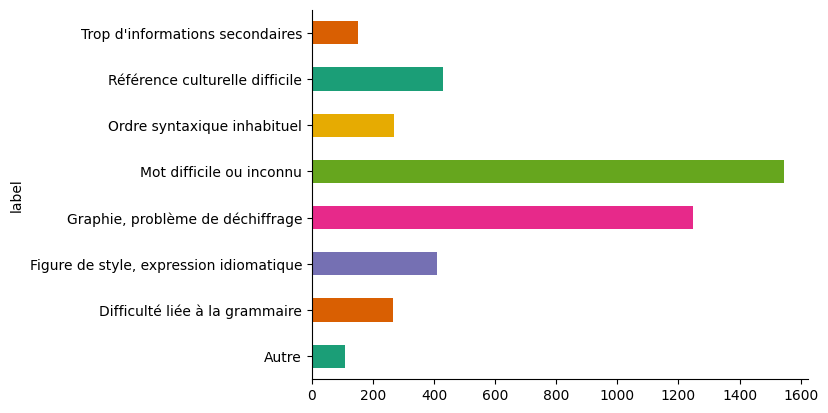

In [30]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df_all_annotations.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [40]:
# Apply json_normalize to each row of the annotations column and keep gold_score_20_label
def normalize_annotations(row):
    annotations_df = json_normalize(row['annotations'])
    # Repeat the gold_score_20_label for each annotation in the row
    annotations_df['gold_score_20_label'] = row['gold_score_20_label']
    return annotations_df

# Apply the normalization function to each row and combine the results
df_annotations_all = local_df.apply(normalize_annotations, axis=1)

# Concatenate all the DataFrames into a single DataFrame
df_all_annotations = pd.concat(df_annotations_all.tolist(), ignore_index=True)


In [41]:
df_all_annotations

,text,start,end,label,annotators,confidence,gold_score_20_label
0,rejoindre,71,80,"Graphie, problème de déchiffrage","[VAV, VIL]",0.67,Facile
1,Heureusement,308,320,"Graphie, problème de déchiffrage",[VIL],0.33,Facile
2,d'alphabétisation.,968,986,"Graphie, problème de déchiffrage","[VAV, VIL]",0.67,Facile
3,et j'ai à nouveau perdu tous mes amis.,579,617,Trop d'informations secondaires,[VIL],0.33,Facile
4,et qui m'a appris à me débrouiller en France.,704,749,Trop d'informations secondaires,[VIL],0.33,Facile
...,...,...,...,...,...,...,...
4429,Wright,355,361,"Graphie, problème de déchiffrage",[PET],0.33,Facile
4430,Lindberg,644,652,"Graphie, problème de déchiffrage",[PET],0.33,Facile
4431,nuit des temps,40,54,"Figure de style, expression idiomatique",[PET],0.33,Facile
4432,Manche,562,568,Référence culturelle difficile,[PET],0.33,Facile


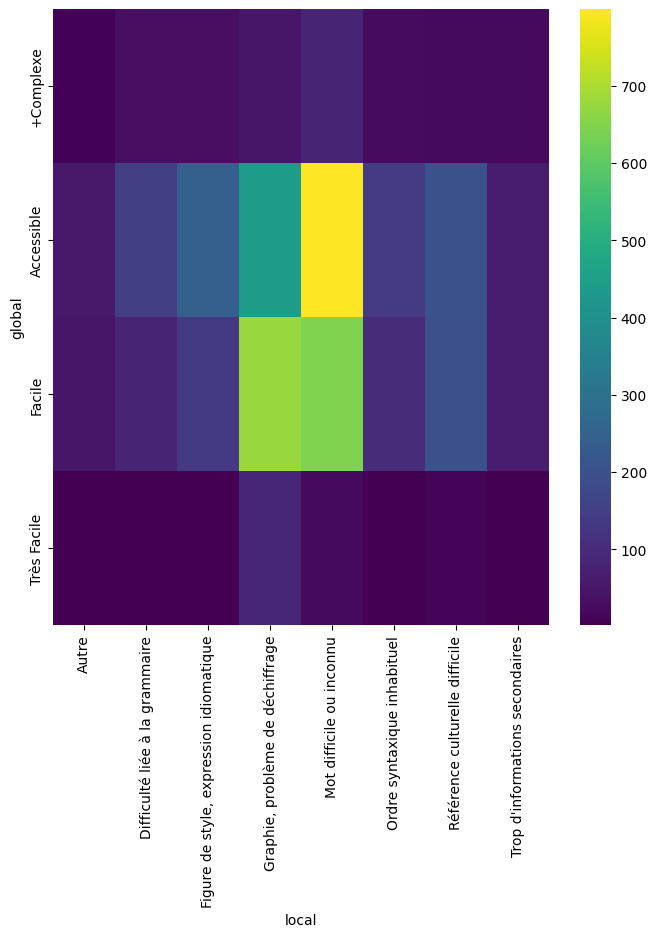

In [44]:
# @title label vs gold_score_20_label

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['gold_score_20_label'].value_counts()
    for x_label, grp in df_all_annotations.groupby('label')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('label')
_ = plt.ylabel('global')
_ = plt.xlabel('local')

In [45]:
df_2dhist

,Autre,Difficulté liée à la grammaire,"Figure de style, expression idiomatique","Graphie, problème de déchiffrage",Mot difficile ou inconnu,Ordre syntaxique inhabituel,Référence culturelle difficile,Trop d'informations secondaires
gold_score_20_label,,,,,,,,
+Complexe,6,33,33,46,80,24,23,23
Accessible,53,151,239,438,799,142,201,65
Facile,48,80,135,676,646,99,196,62
Très Facile,3,3,4,89,21,5,9,2


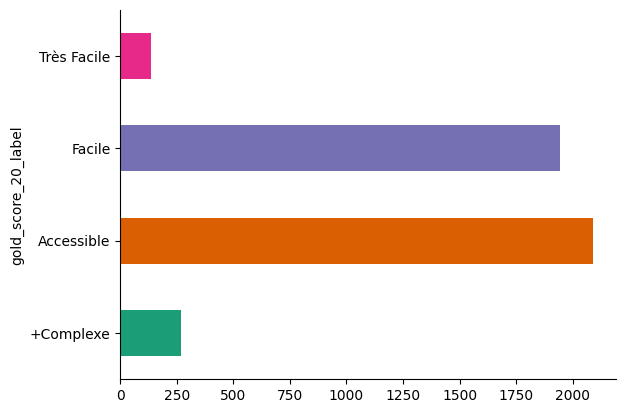

In [42]:
# @title gold_score_20_label

from matplotlib import pyplot as plt
import seaborn as sns
df_all_annotations.groupby('gold_score_20_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)